In [1]:
# Import all the required Libraries

import pdfplumber
from pathlib import Path
import pandas as pd
from operator import itemgetter
import json
import tiktoken
import openai
import chromadb

In [2]:
file = "data/HDFC-Life-Smart-Pension-Plan-Policy-Document-Online.pdf"

In [3]:
with pdfplumber.open(file) as f1:
    first_page = f1.pages[0]
    text = first_page.extract_text()

    tables = first_page.extract_tables()

    print(text)

HDFC Life Smart Pension Plan 101L164V02 – Terms and Conditions (Direct &
Online Sales)
A Unit Linked Non-Participating Individual Pension Plan
PART A: Covering Letter with Policy Schedule
__________________ <dd-mm-yyyy>
__________________
__________________
__________________
__________________
Policy Number: __________________
Your <Policy Name UIN> with Policy No. <Policy no.>
Dear Mr./Ms.___________________________,
Thank you for choosing HDFC Life Insurance as your preferred life insurance solution provider.
We are pleased to enclose your Policy Bond, which carries the following details of your recently purchased HDFC Life Insurance Policy:
 Policy Schedule : Summary of key features of your HDFC Life Insurance Policy
 Premium Receipt : Acknowledgement of the first Premium paid by you
 Terms & Conditions : Detailed terms of your Policy contract with HDFC Life Insurance
 Service Options : Wide range of Policy servicing options that you can benefit from
We request you to carefully

In [4]:
print(len(tables))

0


In [5]:
from IPython.display import display, Markdown
from pprint import pprint

print(text)

HDFC Life Smart Pension Plan 101L164V02 – Terms and Conditions (Direct &
Online Sales)
A Unit Linked Non-Participating Individual Pension Plan
PART A: Covering Letter with Policy Schedule
__________________ <dd-mm-yyyy>
__________________
__________________
__________________
__________________
Policy Number: __________________
Your <Policy Name UIN> with Policy No. <Policy no.>
Dear Mr./Ms.___________________________,
Thank you for choosing HDFC Life Insurance as your preferred life insurance solution provider.
We are pleased to enclose your Policy Bond, which carries the following details of your recently purchased HDFC Life Insurance Policy:
 Policy Schedule : Summary of key features of your HDFC Life Insurance Policy
 Premium Receipt : Acknowledgement of the first Premium paid by you
 Terms & Conditions : Detailed terms of your Policy contract with HDFC Life Insurance
 Service Options : Wide range of Policy servicing options that you can benefit from
We request you to carefully

In [6]:
def pages(pdf, page_number=0):
    with pdfplumber.open(pdf) as f:
        page = f.pages[page_number]
        text = page.extract_text()
        tables = page.extract_tables()
        return text, tables

In [7]:
f1, p1 = pages(file, 2)

In [8]:
print(f1)

HDFC Life Smart Pension Plan 101L164V02 – Terms and Conditions (Direct &
Online Sales)
A Unit Linked Non-Participating Individual Pension Plan
Name of Appointee, if Nominee is
minor
«ZENDFLD_001»
«ZENDFLD_002»
Special Conditions «ZENDFLD_003»
«ZENDFLD_004»
«ZENDFLD_005»
Stamp Duty of Rs. /- is paid as provided under Article 47D(iii) of Indian Stamp Act, 1899 and included in
Consolidated Stamp Duty Paid to the Government of Maharashtra Treasury vide Order of Addl. Controller
Of Stamps, Mumbai at General Stamp Office, Fort, Mumbai - 400001., vide this Order
No.(LOA/CSD/150/2021/Validity Period Dt.07/10/2021 To Dt.31/03/2022 (O/w.No.4088)/Date :
07/10/2021).
«Legend_schedule»«ADDAMT»
Page 3 of 37


In [9]:
len(p1)

1

In [10]:
p1[0][0]

['Name of Appointee, if Nominee is\nminor', '']

In [11]:
json.dumps(p1[0])

'[["Name of Appointee, if Nominee is\\nminor", ""], ["Special Conditions", "\\u00abZENDFLD_001\\u00bb\\n\\u00abZENDFLD_002\\u00bb\\n\\u00abZENDFLD_003\\u00bb\\n\\u00abZENDFLD_004\\u00bb\\n\\u00abZENDFLD_005\\u00bb"]]'

In [12]:
pdf_dir = Path("data")

In [13]:
dir(pdf_dir)

['__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__fspath__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__truediv__',
 '_drv',
 '_flavour',
 '_format_parsed_parts',
 '_from_parsed_parts',
 '_hash',
 '_lines',
 '_lines_cached',
 '_load_parts',
 '_make_child_relpath',
 '_parse_path',
 '_parts_normcase',
 '_parts_normcase_cached',
 '_raw_paths',
 '_root',
 '_scandir',
 '_str',
 '_str_normcase',
 '_str_normcase_cached',
 '_tail',
 '_tail_cached',
 'absolute',
 'anchor',
 'as_posix',
 'as_uri',
 'chmod',
 'cwd',
 'drive',
 'exists',
 'expanduser',
 'glob',
 'group',
 'hardlink_to',
 'home',
 'is_absolute',
 'is_block_device',
 'is_char_device',
 'is_dir'

In [14]:
help(pdf_dir)

Help on PosixPath in module pathlib object:

class PosixPath(Path, PurePosixPath)
 |  PosixPath(*args, **kwargs)
 |
 |  Path subclass for non-Windows systems.
 |
 |  On a POSIX system, instantiating a Path should return this object.
 |
 |  Method resolution order:
 |      PosixPath
 |      Path
 |      PurePosixPath
 |      PurePath
 |      builtins.object
 |
 |  Methods inherited from Path:
 |
 |  __enter__(self)
 |
 |  __exit__(self, t, v, tb)
 |
 |  __init__(self, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  absolute(self)
 |      Return an absolute version of this path by prepending the current
 |      working directory. No normalization or symlink resolution is performed.
 |
 |      Use resolve() to get the canonical path to a file.
 |
 |  chmod(self, mode, *, follow_symlinks=True)
 |      Change the permissions of the path, like os.chmod().
 |
 |  exists(self, *, follow_symlinks=True)
 |      Whether this path exists.
 |
 |      T

In [15]:
import os

pdf_dir = os.path.abspath("data")
for file in os.listdir(pdf_dir):
    print(file)

HDFC-Life-Group-Term-Life-Policy.pdf
HDFC-Life-Smart-Pension-Plan-Policy-Document-Online.pdf
HDFC-Life-Sanchay-Plus-Life-Long-Income-Option-101N134V19-Policy-Document.pdf
HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf
HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf
HDFC-Surgicare-Plan-101N043V01.pdf
HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1).pdf


In [16]:
list(Path(pdf_dir).glob("*.pdf"))

[PosixPath('/Users/deven/Developer/ML_AI/course8_genai/m10_vector_databases/m3_rag/data/HDFC-Life-Group-Term-Life-Policy.pdf'),
 PosixPath('/Users/deven/Developer/ML_AI/course8_genai/m10_vector_databases/m3_rag/data/HDFC-Life-Smart-Pension-Plan-Policy-Document-Online.pdf'),
 PosixPath('/Users/deven/Developer/ML_AI/course8_genai/m10_vector_databases/m3_rag/data/HDFC-Life-Sanchay-Plus-Life-Long-Income-Option-101N134V19-Policy-Document.pdf'),
 PosixPath('/Users/deven/Developer/ML_AI/course8_genai/m10_vector_databases/m3_rag/data/HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf'),
 PosixPath('/Users/deven/Developer/ML_AI/course8_genai/m10_vector_databases/m3_rag/data/HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf'),
 PosixPath('/Users/deven/Developer/ML_AI/course8_genai/m10_vector_databases/m3_rag/data/HDFC-Surgicare-Plan-101N043V01.pdf'),
 PosixPath('/Users/deven/Developer/ML_AI/course8_genai/m10_vector_databases/m3_rag/data/HDFC-Life-Sampoorna-Jeevan-101N158V04

In [17]:
# from pathlib import PurePath
# PurePath(pdf_dir).

In [18]:
Path(pdf_dir).glob("*.pdf")

<generator object Path.glob at 0x11ff9f340>

In [19]:
# Function to check whether a word is present in a table or not for segregation of regular text and tables


def check_bboxes(word, table_bbox):
    # Check whether word is inside a table bbox.
    l = word["x0"], word["top"], word["x1"], word["bottom"]
    r = table_bbox
    return l[0] > r[0] and l[1] > r[1] and l[2] < r[2] and l[3] < r[3]

In [20]:
# Function to extract text from a PDF file.
# 1. Declare a variable p to store the iteration of the loop that will help us store page numbers alongside the text
# 2. Declare an empty list 'full_text' to store all the text files
# 3. Use pdfplumber to open the pdf pages one by one
# 4. Find the tables and their locations in the page
# 5. Extract the text from the tables in the variable 'tables'
# 6. Extract the regular words by calling the function check_bboxes() and checking whether words are present in the table or not
# 7. Use the cluster_objects utility to cluster non-table and table words together so that they retain the same chronology as in the original PDF
# 8. Declare an empty list 'lines' to store the page text
# 9. If a text element in present in the cluster, append it to 'lines', else if a table element is present, append the table
# 10. Append the page number and all lines to full_text, and increment 'p'
# 11. When the function has iterated over all pages, return the 'full_text' list


def extract_text_from_pdf(pdf_path):
    p = 0
    full_text = []

    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            page_no = f"Page {p+1}"
            text = page.extract_text()

            tables = page.find_tables()
            table_bboxes = [i.bbox for i in tables]
            tables = [{"table": i.extract(), "top": i.bbox[1]} for i in tables]
            non_table_words = [
                word
                for word in page.extract_words()
                if not any(
                    [check_bboxes(word, table_bbox) for table_bbox in table_bboxes]
                )
            ]
            lines = []

            for cluster in pdfplumber.utils.cluster_objects(
                non_table_words + tables, itemgetter("top"), tolerance=5
            ):

                if "text" in cluster[0]:
                    try:
                        lines.append(" ".join([i["text"] for i in cluster]))
                    except KeyError:
                        pass

                elif "table" in cluster[0]:
                    lines.append(json.dumps(cluster[0]["table"]))

            full_text.append([page_no, " ".join(lines)])
            p += 1

    return full_text

In [21]:
# Define the directory containing the PDF files
pdf_directory = Path(pdf_dir)

# Initialize an empty list to store the extracted texts and document names
data = []

# Loop through all files in the directory
for pdf_path in pdf_directory.glob("*.pdf"):

    # Process the PDF file
    print(f"...Processing {pdf_path.name}")

    # Call the function to extract the text from the PDF
    extracted_text = extract_text_from_pdf(pdf_path)

    # Convert the extracted list to a PDF, and add a column to store document names
    extracted_text_df = pd.DataFrame(extracted_text, columns=["Page No.", "Page_Text"])
    extracted_text_df["Document Name"] = pdf_path.name

    # Append the extracted text and document name to the list
    data.append(extracted_text_df)

    # Print a message to indicate progress
    print(f"Finished processing {pdf_path.name}")

# Print a message to indicate all PDFs have been processed
print("All PDFs have been processed.")

...Processing HDFC-Life-Group-Term-Life-Policy.pdf
Finished processing HDFC-Life-Group-Term-Life-Policy.pdf
...Processing HDFC-Life-Smart-Pension-Plan-Policy-Document-Online.pdf
Finished processing HDFC-Life-Smart-Pension-Plan-Policy-Document-Online.pdf
...Processing HDFC-Life-Sanchay-Plus-Life-Long-Income-Option-101N134V19-Policy-Document.pdf
Finished processing HDFC-Life-Sanchay-Plus-Life-Long-Income-Option-101N134V19-Policy-Document.pdf
...Processing HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf
Finished processing HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf
...Processing HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf
Finished processing HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf
...Processing HDFC-Surgicare-Plan-101N043V01.pdf
Finished processing HDFC-Surgicare-Plan-101N043V01.pdf
...Processing HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1).pdf
Finished processing HDFC-Life-Sampoorna-Jeevan-101N158V04-Poli

In [22]:
data

[   Page No.                                          Page_Text  \
 0    Page 1  HDFC Life Group Term Life OF «OWNERNAME» Based...   
 1    Page 2  PART A: Covering Letter with Policy Schedule <...   
 2    Page 3  Address : Mobile/Landline Number : A1 Free Loo...   
 3    Page 4  [["Name of Policy", "HDFC Life Group Term Life...   
 4    Page 5  [["Policy No.", ""], ["Name & Address of Polic...   
 5    Page 6  [["", ""], ["Age Eligibility for Members", "Mi...   
 6    Page 7  PART B Important Terms and Definitions B1 Defi...   
 7    Page 8  a) Non-employer-employee groups like employee ...   
 8    Page 9  25. Enabling Clause means the Insured Members ...   
 9   Page 10  40. Registered Independent Medical Practitione...   
 10  Page 11  PART C PRODUCT CORE BENEFITS BENEFITS PAYABLE ...   
 11  Page 12  PART D Policy Servicing Related Aspects D.1. S...   
 12  Page 13  PART E All the applicable Charges, Fund Name, ...   
 13  Page 14  PART F General Terms and Conditions F.1. Basic..

In [23]:
insurance_pdfs_data = pd.concat(data, ignore_index=True)

In [24]:
insurance_pdfs_data

,Page No.,Page_Text,Document Name
0,Page 1,HDFC Life Group Term Life OF «OWNERNAME» Based...,HDFC-Life-Group-Term-Life-Policy.pdf
1,Page 2,PART A: Covering Letter with Policy Schedule <...,HDFC-Life-Group-Term-Life-Policy.pdf
2,Page 3,Address : Mobile/Landline Number : A1 Free Loo...,HDFC-Life-Group-Term-Life-Policy.pdf
3,Page 4,"[[""Name of Policy"", ""HDFC Life Group Term Life...",HDFC-Life-Group-Term-Life-Policy.pdf
4,Page 5,"[[""Policy No."", """"], [""Name & Address of Polic...",HDFC-Life-Group-Term-Life-Policy.pdf
...,...,...,...
212,Page 40,,HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-D...
213,Page 41,,HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-D...
214,Page 42,,HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-D...
215,Page 43,,HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-D...


In [25]:
temp = insurance_pdfs_data["Page_Text"].apply(lambda x: len(x.split()))

In [26]:
insurance_pdfs_data["Text_Length"] = temp

In [27]:
insurance_pdfs_data.head()

,Page No.,Page_Text,Document Name,Text_Length
0,Page 1,HDFC Life Group Term Life OF «OWNERNAME» Based...,HDFC-Life-Group-Term-Life-Policy.pdf,57
1,Page 2,PART A: Covering Letter with Policy Schedule <...,HDFC-Life-Group-Term-Life-Policy.pdf,400
2,Page 3,Address : Mobile/Landline Number : A1 Free Loo...,HDFC-Life-Group-Term-Life-Policy.pdf,618
3,Page 4,"[[""Name of Policy"", ""HDFC Life Group Term Life...",HDFC-Life-Group-Term-Life-Policy.pdf,67
4,Page 5,"[[""Policy No."", """"], [""Name & Address of Polic...",HDFC-Life-Group-Term-Life-Policy.pdf,174


In [28]:
insurance_pdfs_data["Document Name"].value_counts()

Document Name
HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1).pdf                    44
HDFC-Life-Smart-Pension-Plan-Policy-Document-Online.pdf                          37
HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf                      33
HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf                   31
HDFC-Life-Group-Term-Life-Policy.pdf                                             30
HDFC-Life-Sanchay-Plus-Life-Long-Income-Option-101N134V19-Policy-Document.pdf    27
HDFC-Surgicare-Plan-101N043V01.pdf                                               15
Name: count, dtype: int64

In [29]:
max(insurance_pdfs_data["Text_Length"])

994

In [30]:
insurance_pdfs_data.shape[0]

217

In [31]:
insurance_pdfs_data = insurance_pdfs_data.loc[insurance_pdfs_data["Text_Length"] >= 10]

In [32]:
insurance_pdfs_data

,Page No.,Page_Text,Document Name,Text_Length
0,Page 1,HDFC Life Group Term Life OF «OWNERNAME» Based...,HDFC-Life-Group-Term-Life-Policy.pdf,57
1,Page 2,PART A: Covering Letter with Policy Schedule <...,HDFC-Life-Group-Term-Life-Policy.pdf,400
2,Page 3,Address : Mobile/Landline Number : A1 Free Loo...,HDFC-Life-Group-Term-Life-Policy.pdf,618
3,Page 4,"[[""Name of Policy"", ""HDFC Life Group Term Life...",HDFC-Life-Group-Term-Life-Policy.pdf,67
4,Page 5,"[[""Policy No."", """"], [""Name & Address of Polic...",HDFC-Life-Group-Term-Life-Policy.pdf,174
...,...,...,...,...
206,Page 34,Paid-up Addition Factor per Re. 1 Cash Bonus u...,HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-D...,18
207,Page 35,ANNEXURE – V Cash Value Factor per Re.1 vested...,HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-D...,20
208,Page 36,Cash Value Factor per Re.1 vested Paid-up Addi...,HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-D...,17
209,Page 37,Cash Value Factor per Re.1 vested Paid-up Addi...,HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-D...,17


In [33]:
insurance_pdfs_data["Metadata"] = insurance_pdfs_data.apply(
    lambda x: {"Policy Name": x["Document Name"][:-4], "Page No.": x["Page No."]},
    axis=1,
)

/var/folders/7j/0m_dn9hd7bs_1zh2_n7tbb6m0000gn/T/ipykernel_9991/52404842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_pdfs_data["Metadata"] = insurance_pdfs_data.apply(


In [34]:
insurance_pdfs_data

,Page No.,Page_Text,Document Name,Text_Length,Metadata
0,Page 1,HDFC Life Group Term Life OF «OWNERNAME» Based...,HDFC-Life-Group-Term-Life-Policy.pdf,57,{'Policy Name': 'HDFC-Life-Group-Term-Life-Pol...
1,Page 2,PART A: Covering Letter with Policy Schedule <...,HDFC-Life-Group-Term-Life-Policy.pdf,400,{'Policy Name': 'HDFC-Life-Group-Term-Life-Pol...
2,Page 3,Address : Mobile/Landline Number : A1 Free Loo...,HDFC-Life-Group-Term-Life-Policy.pdf,618,{'Policy Name': 'HDFC-Life-Group-Term-Life-Pol...
3,Page 4,"[[""Name of Policy"", ""HDFC Life Group Term Life...",HDFC-Life-Group-Term-Life-Policy.pdf,67,{'Policy Name': 'HDFC-Life-Group-Term-Life-Pol...
4,Page 5,"[[""Policy No."", """"], [""Name & Address of Polic...",HDFC-Life-Group-Term-Life-Policy.pdf,174,{'Policy Name': 'HDFC-Life-Group-Term-Life-Pol...
...,...,...,...,...,...
206,Page 34,Paid-up Addition Factor per Re. 1 Cash Bonus u...,HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-D...,18,{'Policy Name': 'HDFC-Life-Sampoorna-Jeevan-10...
207,Page 35,ANNEXURE – V Cash Value Factor per Re.1 vested...,HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-D...,20,{'Policy Name': 'HDFC-Life-Sampoorna-Jeevan-10...
208,Page 36,Cash Value Factor per Re.1 vested Paid-up Addi...,HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-D...,17,{'Policy Name': 'HDFC-Life-Sampoorna-Jeevan-10...
209,Page 37,Cash Value Factor per Re.1 vested Paid-up Addi...,HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-D...,17,{'Policy Name': 'HDFC-Life-Sampoorna-Jeevan-10...


## 3. Generate Chunking and Embeddings

In [35]:
from openai import OpenAI
from dotenv import load_dotenv
import os

load_dotenv()

openai = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

In [36]:
response = openai.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "Explain transformers in simple terms."},
    ],
    temperature=0.7,
    max_tokens=300,
)

In [37]:
response.model_dump()

{'id': 'chatcmpl-Czsfg4l3Cmn47HUUrZFbdvZTgkdJd',
 'choices': [{'finish_reason': 'stop',
   'index': 0,
   'logprobs': None,
   'message': {'content': 'Sure! Transformers are a type of model used in machine learning, especially in processing language and understanding text. Here’s a simple breakdown of how they work:\n\n1. **Input and Output**: Transformers take in a sequence of words (like a sentence) and produce an output, which can be a translated sentence, a summary, or an answer to a question.\n\n2. **Attention Mechanism**: The key feature of transformers is something called "attention." This allows the model to focus on different parts of the input when making predictions. For example, in the sentence "The cat sat on the mat," the model can pay more attention to "cat" when trying to understand what "sat" refers to.\n\n3. **Layers of Processing**: Transformers consist of multiple layers that process the information. Each layer refines the understanding of the input based on what wa

In [38]:
from chromadb.utils import embedding_functions

In [39]:
client = chromadb.PersistentClient("../../../")

In [40]:
client.list_collections()

[Collection(name=semantic_search1),
 Collection(name=deven),
 Collection(name=Insurance_Cache),
 Collection(name=RAG_on_Insurance)]

In [41]:
model = "text-embedding-3-small"
embedding_function = embedding_functions.OpenAIEmbeddingFunction(
    api_key=os.getenv("OPENAI_API_KEY"), model_name=model
)

In [42]:
# Initialise a collection in chroma and pass the embedding_function to it so that it used OpenAI embeddings to embed the documents

insurance_collection = client.get_or_create_collection(
    name="RAG_on_Insurance", embedding_function=embedding_function
)

In [43]:
insurance_collection.peek()["documents"]

['HDFC Life Group Term Life OF «OWNERNAME» Based on the Proposal and the declarations and any statement made or referred to therein, We will pay the Benefits mentioned in this Policy subject to the terms and conditions contained herein << Designation of the Authorised Signatory >> F&U dated 15th October 2022 UIN-101N169V02 P a ge | 0',
 'PART A: Covering Letter with Policy Schedule <dd-mm-yyyy> __________________ __________________ __________________ __________________ __________________ Your HDFC Life <Policy Name> with Policy No. <Policy no.> Dear Mr./Ms.___________________________, We thank you for choosing HDFC Life Insurance as your preferred life insurance solution provider.. We are pleased to enclose your Policy Bond, which carries the following details of your recently purchased HDFC Life Insurance Policy: \uf0fc Policy Schedule : Summary of key features of your HDFC Life Insurance Policy \uf0fc Premium Receipt : Acknowledgement of the first Premium paid by you \uf0fc Terms & C

In [44]:
insurance_collection.count()

210

In [45]:
display(insurance_pdfs_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 0 to 210
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Page No.       210 non-null    object
 1   Page_Text      210 non-null    object
 2   Document Name  210 non-null    object
 3   Text_Length    210 non-null    int64 
 4   Metadata       210 non-null    object
dtypes: int64(1), object(4)
memory usage: 9.8+ KB


None

In [46]:
insurance_pdfs_data

,Page No.,Page_Text,Document Name,Text_Length,Metadata
0,Page 1,HDFC Life Group Term Life OF «OWNERNAME» Based...,HDFC-Life-Group-Term-Life-Policy.pdf,57,{'Policy Name': 'HDFC-Life-Group-Term-Life-Pol...
1,Page 2,PART A: Covering Letter with Policy Schedule <...,HDFC-Life-Group-Term-Life-Policy.pdf,400,{'Policy Name': 'HDFC-Life-Group-Term-Life-Pol...
2,Page 3,Address : Mobile/Landline Number : A1 Free Loo...,HDFC-Life-Group-Term-Life-Policy.pdf,618,{'Policy Name': 'HDFC-Life-Group-Term-Life-Pol...
3,Page 4,"[[""Name of Policy"", ""HDFC Life Group Term Life...",HDFC-Life-Group-Term-Life-Policy.pdf,67,{'Policy Name': 'HDFC-Life-Group-Term-Life-Pol...
4,Page 5,"[[""Policy No."", """"], [""Name & Address of Polic...",HDFC-Life-Group-Term-Life-Policy.pdf,174,{'Policy Name': 'HDFC-Life-Group-Term-Life-Pol...
...,...,...,...,...,...
206,Page 34,Paid-up Addition Factor per Re. 1 Cash Bonus u...,HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-D...,18,{'Policy Name': 'HDFC-Life-Sampoorna-Jeevan-10...
207,Page 35,ANNEXURE – V Cash Value Factor per Re.1 vested...,HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-D...,20,{'Policy Name': 'HDFC-Life-Sampoorna-Jeevan-10...
208,Page 36,Cash Value Factor per Re.1 vested Paid-up Addi...,HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-D...,17,{'Policy Name': 'HDFC-Life-Sampoorna-Jeevan-10...
209,Page 37,Cash Value Factor per Re.1 vested Paid-up Addi...,HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-D...,17,{'Policy Name': 'HDFC-Life-Sampoorna-Jeevan-10...


In [47]:
document_list = insurance_pdfs_data["Page_Text"].tolist()
metadata_list = insurance_pdfs_data["Metadata"].tolist()

In [48]:
insurance_collection.upsert(
    documents=document_list,
    ids=[str(i) for i in range(insurance_pdfs_data.shape[0])],
    metadatas=metadata_list,
)

In [49]:
insurance_collection.peek()["documents"]

['HDFC Life Group Term Life OF «OWNERNAME» Based on the Proposal and the declarations and any statement made or referred to therein, We will pay the Benefits mentioned in this Policy subject to the terms and conditions contained herein << Designation of the Authorised Signatory >> F&U dated 15th October 2022 UIN-101N169V02 P a ge | 0',
 'PART A: Covering Letter with Policy Schedule <dd-mm-yyyy> __________________ __________________ __________________ __________________ __________________ Your HDFC Life <Policy Name> with Policy No. <Policy no.> Dear Mr./Ms.___________________________, We thank you for choosing HDFC Life Insurance as your preferred life insurance solution provider.. We are pleased to enclose your Policy Bond, which carries the following details of your recently purchased HDFC Life Insurance Policy: \uf0fc Policy Schedule : Summary of key features of your HDFC Life Insurance Policy \uf0fc Premium Receipt : Acknowledgement of the first Premium paid by you \uf0fc Terms & C

In [50]:
x = insurance_collection.get(
    ids=[str(i) for i in range(insurance_pdfs_data.shape[0])],
    include=["embeddings", "documents"],
)

In [51]:
print(x["documents"][0])

HDFC Life Group Term Life OF «OWNERNAME» Based on the Proposal and the declarations and any statement made or referred to therein, We will pay the Benefits mentioned in this Policy subject to the terms and conditions contained herein << Designation of the Authorised Signatory >> F&U dated 15th October 2022 UIN-101N169V02 P a ge | 0


In [52]:
cache_collection = client.get_or_create_collection(
    name="Insurance_Cache", embedding_function=embedding_function
)

In [53]:
cache_collection.peek()["included"]

['metadatas', 'documents', 'embeddings']

In [54]:
cache_collection.peek()

{'ids': ['What are the accidental deaths?',
  'does the insurance cover diabetic patients?'],
 'embeddings': array([[ 0.02954584,  0.054633  ,  0.03891473, ..., -0.01002499,
          0.00541815,  0.02345042],
        [-0.00297344, -0.03364097, -0.02570349, ...,  0.03252126,
         -0.01338672,  0.02228217]], shape=(2, 1536)),
 'documents': ['What are the accidental deaths?',
  'does the insurance cover diabetic patients?'],
 'uris': None,
 'included': ['metadatas', 'documents', 'embeddings'],
 'data': None,
 'metadatas': [{'ids2': '19',
   'included4': 'd',
   'metadatas3': "{'Policy Name': 'HDFC-Life-Group-Term-Life-Policy', 'Page No.': 'Page 7'}",
   'documents4': 'Part B Definitions The following capitalised terms wherever used in this Policy shall have the meanings given hereunder: (1) Accident- means a sudden, unforeseen and involuntary event caused by external, visible and violent means; (2) Appointee- means the person named by you and registered with us in accordance with the

## 3. Semantic Search

In [55]:
query = "What are the accidental deaths?"
query2 = "what is the policy on eye issues?"

In [56]:
def create_data_frame_from_dictionary(d):
    df = pd.DataFrame()
    # keys = d.keys()
    l = [
        (x, y)
        for x, y in zip(d.keys(), d.values())
        if y is not None and x not in ("embeddings", "ids", "included")
    ]

    for x, y in l:

        if x == "embeddings" or x == "ids" or y is None:
            continue
        # print(x,y[0])

        df = pd.concat([df, pd.DataFrame.from_dict({x: y[0]})], axis=1)
        # display(df)

    return df

In [57]:
results1 = insurance_collection.query(
    query_texts=query,
    n_results=3,
    include=["documents", "distances"],
)

In [58]:
l = [
    (x, y)
    for x, y in zip(results1.keys(), results1.values())
    if y is not None and x not in ("embeddings", "ids", "included")
]

In [59]:
create_data_frame_from_dictionary(results1)

,documents,distances
0,"Note: For the purpose of waiting period, Date ...",0.629991
1,Part C 1. Benefits: (1) Benefits on Death or d...,0.645415
2,F.21. Notice by the Company under the Policy A...,0.650919


In [60]:
results = insurance_collection.query(
    query_texts=query2,
    n_results=3,
    include=["documents", "metadatas", "distances", "embeddings"],
)

In [61]:
# what is the policy on eye issues?
create_data_frame_from_dictionary(results1)

,documents,distances
0,"Note: For the purpose of waiting period, Date ...",0.629991
1,Part C 1. Benefits: (1) Benefits on Death or d...,0.645415
2,F.21. Notice by the Company under the Policy A...,0.650919


In [62]:
create_data_frame_from_dictionary(results)

,documents,metadatas,distances
0,"7. Routine eye tests, any Dental Treatment or ...",{'Policy Name': 'HDFC-Life-Easy-Health-101N110...,0.585931
1,Part F 1. Waiting Period  60 days waiting per...,{'Policy Name': 'HDFC-Life-Easy-Health-101N110...,0.622845
2,Part D 1. Claims Procedure You have the option...,"{'Page No.': 'Page 13', 'Policy Name': 'HDFC-L...",0.633317


In [63]:
cache_results = cache_collection.query(query_texts=query, n_results=20)

In [64]:
cache_results

{'ids': [['What are the accidental deaths?',
   'does the insurance cover diabetic patients?']],
 'embeddings': None,
 'documents': [['What are the accidental deaths?',
   'does the insurance cover diabetic patients?']],
 'uris': None,
 'included': ['metadatas', 'documents', 'distances'],
 'data': None,
 'metadatas': [[{'included2': 't',
    'distances5': '0.6687968969345093',
    'metadatas7': "{'Policy Name': 'HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1)', 'Page No.': 'Page 19'}",
    'ids1': '132',
    'metadatas1': "{'Policy Name': 'HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document', 'Page No.': 'Page 7'}",
    'documents6': 'PART C PRODUCT CORE BENEFITS BENEFITS PAYABLE UNDER THIS POLICY: C.1.Subject to the terms and conditions of this Policy, in the event of death of the Insured Member during the term of the Insurance Cover, the Sum Assured shall become payable as defined hereunder: C.1.1 In case a Policy is issued under an Employer Employee group insurance 

In [65]:
results = insurance_collection.query(query_texts=query, n_results=10)

In [66]:
results_df2 = pd.DataFrame.from_dict(
    {
        "Documents": results["documents"][0],
        "Metadata": results["metadatas"][0],
        "distances": results["distances"][0],
    }
)

In [67]:
results_df2

,Documents,Metadata,distances
0,"Note: For the purpose of waiting period, Date ...",{'Policy Name': 'HDFC-Life-Group-Poorna-Suraks...,0.630059
1,Part C 1. Benefits: (1) Benefits on Death or d...,"{'Page No.': 'Page 7', 'Policy Name': 'HDFC-Li...",0.645459
2,F.21. Notice by the Company under the Policy A...,{'Policy Name': 'HDFC-Life-Group-Term-Life-Pol...,0.650966
3,PART B Important Terms and Definitions B1 Defi...,{'Policy Name': 'HDFC-Life-Group-Term-Life-Pol...,0.652782
4,Part B Definitions The following capitalised t...,"{'Page No.': 'Page 5', 'Policy Name': 'HDFC-Li...",0.659209
5,"7. Routine eye tests, any Dental Treatment or ...","{'Page No.': 'Page 17', 'Policy Name': 'HDFC-L...",0.668817
6,PART C PRODUCT CORE BENEFITS BENEFITS PAYABLE ...,"{'Page No.': 'Page 11', 'Policy Name': 'HDFC-L...",0.670204
7,"(i) Death Certificate, in original, issued by ...","{'Page No.': 'Page 19', 'Policy Name': 'HDFC-L...",0.672225
8,"[["""", """", ""apart; and\nii. Requiring continuou...",{'Policy Name': 'HDFC-Life-Easy-Health-101N110...,0.676311
9,Part F 1. Waiting Period and Exclusions: i. 90...,"{'Page No.': 'Page 14', 'Policy Name': 'HDFC-L...",0.677146


In [68]:
# Implementing Cache in Semantic Search
# todo
# Set a threshold for cache search
threshold = 0.2

ids = []
documents = []
distances = []
metadatas = []
results_df = pd.DataFrame()

cache_results_dict = {}
# If the distance is greater than the threshold, then return the results from the main collection.

if cache_results["distances"][0] == [] or cache_results["distances"][0][0] > threshold:
    # Query the collection against the user query and return the top 10 results
    results = insurance_collection.query(query_texts=query, n_results=10)
    # print(results.keys()['documents'])
    # Store the query in cache_collection as document w.r.t to ChromaDB so that it can be embedded and searched against later
    # Store retrieved text, ids, distances and metadatas in cache_collection as metadatas, so that they can be fetched easily if a query indeed matches to a query in cache
    Keys = []
    Values = []

    for key, val in results.items():
        if val is None:
            continue
        for i in range(len(results)):
            Keys.append(str(key) + str(i))  # todo
            Values.append(str(val[0][i]))
    print(Keys, Values)

    cache_collection.add(
        documents=[query],
        ids=[
            query
        ],  # Or if you want to assign integers as IDs 0,1,2,.., then you can use "len(cache_results['documents'])" as will return the no. of queries currently in the cache and assign the next digit to the new query."
        metadatas=dict(zip(Keys, Values)),
    )

    print("Not found in cache. Found in main collection.")

    result_dict = {
        "Metadatas": results["metadatas"][0],
        "Documents": results["documents"][0],
        "Distances": results["distances"][0],
        "IDs": results["ids"][0],
    }
    results_df = pd.DataFrame.from_dict(result_dict)
    display(results_df)


# If the distance is, however, less than the threshold, you can return the results from cache

elif cache_results["distances"][0][0] <= threshold:
    cache_result_dict = cache_results["metadatas"][0][0]

    # Loop through each inner list and then through the dictionary
    for key, value in cache_result_dict.items():
        if "ids" in key:
            ids.append(value)
        elif "documents" in key:
            documents.append(value)
        elif "distances" in key:
            distances.append(value)
        elif "metadatas" in key:
            metadatas.append(value)

    print("Found in cache!")

    # Create a DataFrame
    results_df = pd.DataFrame(
        {
            "IDs": ids,
            "Documents": documents,
            "Distances": distances,
            "Metadatas": metadatas,
        }
    )

Found in cache!


In [69]:
results_df

,IDs,Documents,Distances,Metadatas
0,132,PART C PRODUCT CORE BENEFITS BENEFITS PAYABLE ...,0.6687968969345093,{'Policy Name': 'HDFC-Life-Sampoorna-Jeevan-10...
1,109,PART B Important Terms and Definitions B1 Defi...,0.6300311088562012,{'Policy Name': 'HDFC-Life-Group-Poorna-Suraks...
2,19,Part B Definitions The following capitalised t...,0.6592146158218384,"{'Page No.': 'Page 11', 'Policy Name': 'HDFC-L..."
3,98,F.21. Notice by the Company under the Policy A...,0.6509936451911926,{'Policy Name': 'HDFC-Life-Group-Term-Life-Pol...
4,6,"(i) Death Certificate, in original, issued by ...",0.6528116464614868,{'Policy Name': 'HDFC-Life-Easy-Health-101N110...
5,140,"7. Routine eye tests, any Dental Treatment or ...",0.6701849102973938,"{'Page No.': 'Page 17', 'Policy Name': 'HDFC-L..."
6,10,Part C 1. Benefits: (1) Benefits on Death or d...,0.6721856594085693,{'Policy Name': 'HDFC-Life-Group-Term-Life-Pol...
7,190,"Note: For the purpose of waiting period, Date ...",0.6453939080238342,{'Policy Name': 'HDFC-Life-Group-Poorna-Suraks...


In [70]:
len(cache_results_dict)

0

In [71]:
cache_collection.count()

2

In [72]:
insurance_collection.count()

210

In [73]:
cache_collection.peek()["embeddings"]

array([[ 0.02954584,  0.054633  ,  0.03891473, ..., -0.01002499,
         0.00541815,  0.02345042],
       [-0.00297344, -0.03364097, -0.02570349, ...,  0.03252126,
        -0.01338672,  0.02228217]], shape=(2, 1536))

In [74]:
[
    (x, y)
    for x, y in zip(cache_collection.peek().keys(), cache_collection.peek().values())
]

[('ids',
  ['What are the accidental deaths?',
   'does the insurance cover diabetic patients?']),
 ('embeddings',
  array([[ 0.02954584,  0.054633  ,  0.03891473, ..., -0.01002499,
           0.00541815,  0.02345042],
         [-0.00297344, -0.03364097, -0.02570349, ...,  0.03252126,
          -0.01338672,  0.02228217]], shape=(2, 1536))),
 ('documents',
  ['What are the accidental deaths?',
   'does the insurance cover diabetic patients?']),
 ('uris', None),
 ('included', ['metadatas', 'documents', 'embeddings']),
 ('data', None),
 ('metadatas',
  [{'documents7': '(i) Death Certificate, in original, issued by the competent authority; (ii) Policy Document, in original; (iii) Identification proof (bearing photo) of person receiving the Benefit and the Life Assured. (iv) Medical treatment records (discharge summary / death summary, investigation reports, etc.) if Life Assured has taken treatment for illness leading to his/her death. (v) Bank account details of the claimant along with IF

In [75]:
cache_collection.peek().keys()

dict_keys(['ids', 'embeddings', 'documents', 'uris', 'included', 'data', 'metadatas'])

In [76]:
pd.DataFrame.from_dict(cache_collection.peek().items())

,0,1
0,ids,"[What are the accidental deaths?, does the ins..."
1,embeddings,"[[0.029545843601226807, 0.0546330027282238, 0...."
2,documents,"[What are the accidental deaths?, does the ins..."
3,uris,None
4,included,"[metadatas, documents, embeddings]"
5,data,None
6,metadatas,[{'documents2': 'F.21. Notice by the Company u...


## 4. <font color = red> Semantic Search with Cache

In this section, we will perform a semantic search of a query in the collections embeddings to get several top semantically similar results.

In [78]:
query3 = "Does the insurance cover diabetic patients?".lower()

In [79]:
results = insurance_collection.query(query_texts=query3, n_results=10)

In [80]:
create_data_frame_from_dictionary(results)

,documents,metadatas,distances
0,HDFC Standard Life Insurance Company Limited H...,{'Policy Name': 'HDFC-Surgicare-Plan-101N043V0...,0.583556
1,"[[""Plan option"", ""Benefits covered""], [""A"", ""D...",{'Policy Name': 'HDFC-Life-Easy-Health-101N110...,0.593711
2,HDFC Standard Life Insurance Company Limited H...,{'Policy Name': 'HDFC-Surgicare-Plan-101N043V0...,0.611127
3,Part D 1. Claims Procedure You have the option...,"{'Page No.': 'Page 13', 'Policy Name': 'HDFC-L...",0.613333
4,HDFC Standard Life Insurance Company Limited H...,"{'Page No.': 'Page 7', 'Policy Name': 'HDFC-Su...",0.616285
5,HDFC Standard Life Insurance Company Limited H...,"{'Page No.': 'Page 5', 'Policy Name': 'HDFC-Su...",0.622970
6,HDFC Standard Life Insurance Company Limited H...,"{'Page No.': 'Page 6', 'Policy Name': 'HDFC-Su...",0.622988
7,HDFC Standard Life Insurance Company Limited H...,"{'Page No.': 'Page 10', 'Policy Name': 'HDFC-S...",0.626703
8,"7. Routine eye tests, any Dental Treatment or ...","{'Page No.': 'Page 17', 'Policy Name': 'HDFC-L...",0.629998
9,HDFC Standard Life Insurance Company Limited H...,"{'Page No.': 'Page 11', 'Policy Name': 'HDFC-S...",0.632706


In [81]:
# Implementing Cache in Semantic Search

# Set a threshold for cache search
threshold = 0.2

ids = []
documents = []
distances = []
metadatas = []
results_df = pd.DataFrame()

query = query3
# If the distance is greater than the threshold, then return the results from the main collection.

if cache_results["distances"][0] == [] or cache_results["distances"][0][0] > threshold:
    # Query the collection against the user query and return the top 10 results
    results = insurance_collection.query(query_texts=query, n_results=10)

    # Store the query in cache_collection as document w.r.t to ChromaDB so that it can be embedded and searched against later
    # Store retrieved text, ids, distances and metadatas in cache_collection as metadatas, so that they can be fetched easily if a query indeed matches to a query in cache
    Keys = []
    Values = []

    for key, val in results.items():
        if val is None:
            continue
        for i in range(len(results)):
            Keys.append(str(key) + str(i))
            Values.append(str(val[0][i]))

    cache_collection.add(
        documents=[query],
        ids=[
            query
        ],  # Or if you want to assign integers as IDs 0,1,2,.., then you can use "len(cache_results['documents'])" as will return the no. of queries currently in the cache and assign the next digit to the new query."
        metadatas=dict(zip(Keys, Values)),
    )

    print("Not found in cache. Found in main collection.")

    result_dict = {
        "Metadatas": results["metadatas"][0],
        "Documents": results["documents"][0],
        "Distances": results["distances"][0],
        "IDs": results["ids"][0],
    }
    results_df = pd.DataFrame.from_dict(result_dict)
    display(results_df)


# If the distance is, however, less than the threshold, you can return the results from cache

elif cache_results["distances"][0][0] <= threshold:
    cache_result_dict = cache_results["metadatas"][0][0]

    # Loop through each inner list and then through the dictionary
    for key, value in cache_result_dict.items():
        if "ids" in key:
            ids.append(value)
        elif "documents" in key:
            documents.append(value)
        elif "distances" in key:
            distances.append(value)
        elif "metadatas" in key:
            metadatas.append(value)

    print("Found in cache!")

    # Create a DataFrame
    results_df = pd.DataFrame(
        {
            "IDs": ids,
            "Documents": documents,
            "Distances": distances,
            "Metadatas": metadatas,
        }
    )

Found in cache!


In [82]:
results_df

,IDs,Documents,Distances,Metadatas
0,132,PART C PRODUCT CORE BENEFITS BENEFITS PAYABLE ...,0.6687968969345093,{'Policy Name': 'HDFC-Life-Sampoorna-Jeevan-10...
1,109,PART B Important Terms and Definitions B1 Defi...,0.6300311088562012,{'Policy Name': 'HDFC-Life-Group-Poorna-Suraks...
2,19,Part B Definitions The following capitalised t...,0.6592146158218384,"{'Page No.': 'Page 11', 'Policy Name': 'HDFC-L..."
3,98,F.21. Notice by the Company under the Policy A...,0.6509936451911926,{'Policy Name': 'HDFC-Life-Group-Term-Life-Pol...
4,6,"(i) Death Certificate, in original, issued by ...",0.6528116464614868,{'Policy Name': 'HDFC-Life-Easy-Health-101N110...
5,140,"7. Routine eye tests, any Dental Treatment or ...",0.6701849102973938,"{'Page No.': 'Page 17', 'Policy Name': 'HDFC-L..."
6,10,Part C 1. Benefits: (1) Benefits on Death or d...,0.6721856594085693,{'Policy Name': 'HDFC-Life-Group-Term-Life-Pol...
7,190,"Note: For the purpose of waiting period, Date ...",0.6453939080238342,{'Policy Name': 'HDFC-Life-Group-Poorna-Suraks...


In [83]:
results_df["Metadatas"][0]

"{'Policy Name': 'HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1)', 'Page No.': 'Page 19'}"

## 5. <font color = red> Re-Ranking with a Cross Encoder

Re-ranking the results obtained from your semantic search can sometime significantly improve the relevance of the retrieved results. This is often done by passing the query paired with each of the retrieved responses into a cross-encoder to score the relevance of the response w.r.t. the query.

<br>

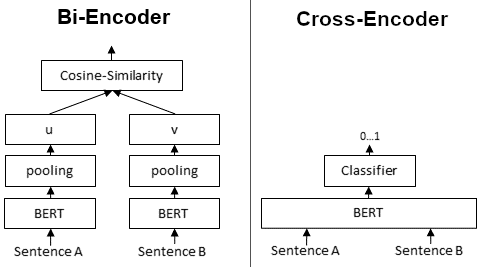

<br>

In [84]:
from sentence_transformers import CrossEncoder, util, SentenceTransformer

In [86]:
model = CrossEncoder("cross-encoder/ms-marco-MiniLM-L-6-v2")

In [ ]:
# def get_modules(x):
#     for val in x.modules():
#         yield val.modules()

In [87]:
# Test the cross encoder model

scores = model.predict(
    [
        [
            "Does the insurance cover diabetic patients?",
            "The insurance policy does not cover some pre-existing conditions including diabetes. ",
        ],
        [
            "Does the insurance cover diabetic patients?",
            "The premium rates for various age groups are given as follows. Age group (<18 years): Premium rate",
        ],
    ]
)

In [ ]:
# pool = model.start_multi_process_pool()
# model = CrossEncoder("cross-encoder/stsb-roberta-base")
# model.predict(sentences)
# model.stop_multi_process_pool(pool)

In [88]:
model = CrossEncoder("cross-encoder/ms-marco-MiniLM-L6-v2")

query = "Who wrote 'To Kill a Mockingbird'?"
documents = [
    "'To Kill a Mockingbird' is a novel by Harper Lee published in 1960. It was immediately successful, winning the Pulitzer Prize, and has become a classic of modern American literature.",
    "The novel 'Moby-Dick' was written by Herman Melville and first published in 1851. It is considered a masterpiece of American literature and deals with complex themes of obsession, revenge, and the conflict between good and evil.",
    "Harper Lee, an American novelist widely known for her novel 'To Kill a Mockingbird', was born in 1926 in Monroeville, Alabama. She received the Pulitzer Prize for Fiction in 1961.",
    "Jane Austen was an English novelist known primarily for her six major novels, which interpret, critique and comment upon the British landed gentry at the end of the 18th century.",
    "The 'Harry Potter' series, which consists of seven fantasy novels written by British author J.K. Rowling, is among the most popular and critically acclaimed books of the modern era.",
    "'The Great Gatsby', a novel written by American author F. Scott Fitzgerald, was published in 1925. The story is set in the Jazz Age and follows the life of millionaire Jay Gatsby and his pursuit of Daisy Buchanan.",
]

In [89]:
cross_ranks = [[query, response] for response in results_df["Documents"]]

In [90]:
pool = model.start_multi_process_pool()
scores = model.predict(cross_ranks, pool=pool, show_progress_bar=True)
model.stop_multi_process_pool(pool)

Chunks:   0%|          | 0/8 [00:00<?, ?it/s]

In [91]:
scores

array([-11.281206, -11.275852, -11.313189, -11.017349, -11.265366,
       -10.894442, -11.232   , -11.135276], dtype=float32)

In [ ]:
import sentence_transformers

In [92]:
results_df["Reranked_scores"] = scores

In [93]:
results_df

,IDs,Documents,Distances,Metadatas,Reranked_scores
0,132,PART C PRODUCT CORE BENEFITS BENEFITS PAYABLE ...,0.6687968969345093,{'Policy Name': 'HDFC-Life-Sampoorna-Jeevan-10...,-11.281206
1,109,PART B Important Terms and Definitions B1 Defi...,0.6300311088562012,{'Policy Name': 'HDFC-Life-Group-Poorna-Suraks...,-11.275852
2,19,Part B Definitions The following capitalised t...,0.6592146158218384,"{'Page No.': 'Page 11', 'Policy Name': 'HDFC-L...",-11.313189
3,98,F.21. Notice by the Company under the Policy A...,0.6509936451911926,{'Policy Name': 'HDFC-Life-Group-Term-Life-Pol...,-11.017349
4,6,"(i) Death Certificate, in original, issued by ...",0.6528116464614868,{'Policy Name': 'HDFC-Life-Easy-Health-101N110...,-11.265366
5,140,"7. Routine eye tests, any Dental Treatment or ...",0.6701849102973938,"{'Page No.': 'Page 17', 'Policy Name': 'HDFC-L...",-10.894442
6,10,Part C 1. Benefits: (1) Benefits on Death or d...,0.6721856594085693,{'Policy Name': 'HDFC-Life-Group-Term-Life-Pol...,-11.232000
7,190,"Note: For the purpose of waiting period, Date ...",0.6453939080238342,{'Policy Name': 'HDFC-Life-Group-Poorna-Suraks...,-11.135276


In [ ]:
results_df

In [94]:
# Return the top 3 results from semantic search

top_3_semantic = results_df.sort_values(by="Distances")
top_3_semantic[:3]

,IDs,Documents,Distances,Metadatas,Reranked_scores
1,109,PART B Important Terms and Definitions B1 Defi...,0.6300311088562012,{'Policy Name': 'HDFC-Life-Group-Poorna-Suraks...,-11.275852
7,190,"Note: For the purpose of waiting period, Date ...",0.6453939080238342,{'Policy Name': 'HDFC-Life-Group-Poorna-Suraks...,-11.135276
3,98,F.21. Notice by the Company under the Policy A...,0.6509936451911926,{'Policy Name': 'HDFC-Life-Group-Term-Life-Pol...,-11.017349


In [95]:
top_3_rerank = results_df.sort_values(by="Reranked_scores", ascending=False)
top_3_rerank[:3]

,IDs,Documents,Distances,Metadatas,Reranked_scores
5,140,"7. Routine eye tests, any Dental Treatment or ...",0.6701849102973938,"{'Page No.': 'Page 17', 'Policy Name': 'HDFC-L...",-10.894442
3,98,F.21. Notice by the Company under the Policy A...,0.6509936451911926,{'Policy Name': 'HDFC-Life-Group-Term-Life-Pol...,-11.017349
7,190,"Note: For the purpose of waiting period, Date ...",0.6453939080238342,{'Policy Name': 'HDFC-Life-Group-Poorna-Suraks...,-11.135276


In [96]:
top_3_RAG = top_3_rerank[["Documents", "Metadatas"]][:3]

In [97]:
top_3_RAG

,Documents,Metadatas
5,"7. Routine eye tests, any Dental Treatment or ...","{'Page No.': 'Page 17', 'Policy Name': 'HDFC-L..."
3,F.21. Notice by the Company under the Policy A...,{'Policy Name': 'HDFC-Life-Group-Term-Life-Pol...
7,"Note: For the purpose of waiting period, Date ...",{'Policy Name': 'HDFC-Life-Group-Poorna-Suraks...


## 6. Retrieval Augmented Generation

Now that we have the final top search results, we can pass it to an GPT 3.5 along with the user query and a well-engineered prompt, to generate a direct answer to the query along with citations, rather than returning whole pages/chunks.

In [98]:
# Define the function to generate the response. Provide a comprehensive prompt that passes the user query and the top 3 results to the model


def generate_response(query, results_df):
    """
    Generate a response using GPT-3.5's ChatCompletion based on the user query and retrieved information.
    """
    messages = [
        {
            "role": "system",
            "content": "You are a helpful assistant in the insurance domain who can effectively answer user queries about insurance policies and documents.",
        },
        {
            "role": "user",
            "content": f"""You are a helpful assistant in the insurance domain who can effectively answer user queries about insurance policies and documents.
                                                You have a question asked by the user in '{query}' and you have some search results from a corpus of insurance documents in the dataframe '{top_3_RAG}'. These search results are essentially one page of an insurance document that may be relevant to the user query.

                                                The column 'documents' inside this dataframe contains the actual text from the policy document and the column 'metadata' contains the policy name and source page. The text inside the document may also contain tables in the format of a list of lists where each of the nested lists indicates a row.

                                                Use the documents in '{top_3_RAG}' to answer the query '{query}'. Frame an informative answer and also, use the dataframe to return the relevant policy names and page numbers as citations.

                                                Follow the guidelines below when performing the task.
                                                1. Try to provide relevant/accurate numbers if available.
                                                2. You don’t have to necessarily use all the information in the dataframe. Only choose information that is relevant.
                                                3. If the document text has tables with relevant information, please reformat the table and return the final information in a tabular in format.
                                                3. Use the Metadatas columns in the dataframe to retrieve and cite the policy name(s) and page numbers(s) as citation.
                                                4. If you can't provide the complete answer, please also provide any information that will help the user to search specific sections in the relevant cited documents.
                                                5. You are a customer facing assistant, so do not provide any information on internal workings, just answer the query directly.

                                                The generated response should answer the query directly addressing the user and avoiding additional information. If you think that the query is not relevant to the document, reply that the query is irrelevant. Provide the final response as a well-formatted and easily readable text along with the citation. Provide your complete response first with all information, and then provide the citations.
                                                """,
        },
    ]

    response = openai.chat.completions.create(model="gpt-3.5-turbo", messages=messages)

    return response.choices[0].message.content.split("\n")

In [101]:
response = generate_response("what is the policy on eye issues?", top_3_RAG)

In [102]:
response

['The policy covers routine eye tests and any dental treatment as mentioned on Page 17 of HDFC Life Group Policy.',
 '',
 'Citation:',
 '- Policy Name: HDFC Life Group Policy',
 '- Page Number: Page 17']

In [103]:
print("\n".join(response))

The policy covers routine eye tests and any dental treatment as mentioned on Page 17 of HDFC Life Group Policy.

Citation:
- Policy Name: HDFC Life Group Policy
- Page Number: Page 17
